In [1]:
import sys
import os
sys.path.append(os.pardir)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from net.TwoLayerNet import TwoLayerNet
from data import mnist

In [3]:
data_set = mnist.read_data(base_dir='./mnist_data', one_hot=True)

reading ./mnist_data\train-images-idx3-ubyte.gz
reading ./mnist_data\t10k-images-idx3-ubyte.gz
reading ./mnist_data\train-labels-idx1-ubyte.gz
reading ./mnist_data\t10k-labels-idx1-ubyte.gz


In [4]:
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

In [5]:
num_iter = 10000
train_size = data_set.train.images.shape[0]
batch_size = 100
learning_rate = 0.1
iter_per_epoch = max(train_size / batch_size, 1)

train_loss_history = []
train_acc_history = []
test_acc_history = []

In [6]:
for i in range(1, num_iter + 1):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = data_set.train.images[batch_mask]
    y_batch = data_set.train.labels[batch_mask]
    grad = network.gradient(x_batch, y_batch)
    
    for key in ['W1', 'b1', 'W2', 'b2']:
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, y_batch)
    train_loss_history.append(loss)
    
    if (i + 1) % iter_per_epoch == 0:
        train_acc = network.accuracy(data_set.train.images, data_set.train.labels)
        test_acc = network.accuracy(data_set.test.images, data_set.test.labels)
        print("iter: {}, train_acc = {:.4f}, test_acc = {:.4f}".format(i + 1, train_acc, test_acc))
        train_acc_history.append(train_acc)
        test_acc_history.append(test_acc)

iter: 550, train_acc = 0.8978, test_acc = 0.9020
iter: 1100, train_acc = 0.9215, test_acc = 0.9253
iter: 1650, train_acc = 0.9309, test_acc = 0.9294
iter: 2200, train_acc = 0.9426, test_acc = 0.9393
iter: 2750, train_acc = 0.9487, test_acc = 0.9466
iter: 3300, train_acc = 0.9533, test_acc = 0.9482
iter: 3850, train_acc = 0.9574, test_acc = 0.9542
iter: 4400, train_acc = 0.9612, test_acc = 0.9571
iter: 4950, train_acc = 0.9594, test_acc = 0.9544
iter: 5500, train_acc = 0.9679, test_acc = 0.9622
iter: 6050, train_acc = 0.9702, test_acc = 0.9640
iter: 6600, train_acc = 0.9709, test_acc = 0.9643
iter: 7150, train_acc = 0.9731, test_acc = 0.9658
iter: 7700, train_acc = 0.9761, test_acc = 0.9678
iter: 8250, train_acc = 0.9757, test_acc = 0.9682
iter: 8800, train_acc = 0.9772, test_acc = 0.9685
iter: 9350, train_acc = 0.9785, test_acc = 0.9706
iter: 9900, train_acc = 0.9793, test_acc = 0.9713


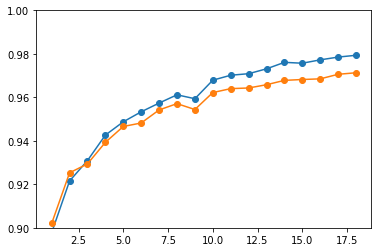

In [7]:
plt.figure()
epochs = range(1, len(train_acc_history) + 1)
plt.plot(epochs, train_acc_history, marker='o')
plt.plot(epochs, test_acc_history, marker='o')
plt.ylim(0.90, 1)
plt.show()